# Simple SED-ML example

This notebook creates a simple model in [SED-ML version 1 level 4](https://sed-ml.org/specifications.html). It builds a model of metabolite A degrading.

## 1) Including libraries

In [1]:
from combine_notebooks import RESULTS_DIR
import libsedml

## 2) Declaring the SED-ML model

In [2]:
 # create the document
doc = libsedml.SedDocument(1, 4)
# create a first model referencing an sbml file
model = doc.createModel()
model.setId("model1")
model.setSource("model1.xml")
model.setLanguage("urn:sedml:language:sbml") 

0

Simulators

In [3]:
# create simulation
tc = doc.createUniformTimeCourse()
tc.setId("sim1")
tc.setInitialTime(0.0)
tc.setOutputStartTime(0.0)
tc.setOutputEndTime(10.0)
tc.setNumberOfSteps(100)
# need to set the correct KISAO Term
alg = tc.createAlgorithm()
alg.setName("Deterministic (LSODA)")
alg.setKisaoID("KISAO:0000560")
# add algorithm parameters
alg_par1 = alg.createAlgorithmParameter()
alg_par1.setName("Relative Tolerance")
alg_par1.setKisaoID("KISAO:0000209")
alg_par1.setValue("1e-06")
alg_par2 = alg.createAlgorithmParameter()
alg_par2.setName("Absolute Tolerance")
alg_par2.setKisaoID("KISAO:0000211")
alg_par2.setValue("1e-12")
alg_par3 = alg.createAlgorithmParameter()
alg_par3.setName("Integrate Reduced Model")
alg_par3.setKisaoID("KISAO:0000216")
alg_par3.setValue("0")
alg_par4 = alg.createAlgorithmParameter()
alg_par4.setName("Max Internal Steps")
alg_par4.setKisaoID("KISAO:0000415")
alg_par4.setValue("100000")


0

Task

In [4]:
# create a task that uses the simulation and the model above
task = doc.createTask()
task.setId("task1")
task.setModelReference("model1")
task.setSimulationReference("sim1")


0

Data generators

In [5]:
# add a DataGenerator to hold the output for time
dg = doc.createDataGenerator()
dg.setId("_1_task1")
dg.setName("Time")
var = dg.createVariable()
var.setId("p1__1_task1")
var.setName("Time")
var.setTaskReference("task1")
var.setSymbol("urn:sedml:symbol:time")
var.setTerm("KISAO:0000832")
dg.setMath(libsedml.parseFormula("p1__1_task1"))

dg = doc.createDataGenerator()
dg.setId("A_1_task1")
dg.setName("[A]")
var = dg.createVariable()
var.setId("p1_A_1_task1")
var.setName("[A]")
var.setTarget("/sbml:sbml/sbml:model/sbml:listOfSpecies/sbml:species[@id=&apos;A&apos;]")
var.setTaskReference("task1")
var.setTerm("KISAO:0000838")
dg.setMath(libsedml.parseFormula("p1_A_1_task1"))



0

Outputs

In [6]:
# add a 2d plot
plot = doc.createPlot2D()
plot.setId("plot_1_task1")
plot.setName("Concentrations, Volumes, and Global Quantity Values")
curve = plot.createCurve()
curve.setId("p1_curve_1_task1")
curve.setName("[A]")
curve.setLogX(False)
curve.setLogY(False)
curve.setStyle("style1")
curve.setXDataReference("_1_task1")
curve.setYDataReference("A_1_task1")

0

Styles

In [7]:
style : libsedml.SedStyle = doc.createStyle()
style.setId("style1")
line = style.createLineStyle()
line.setType("solid")
line.setThickness(1.2)
marker = style.createMarkerStyle()
marker.setType("none")


0

## 3) Write and print the generated file 

In [8]:
sedml_file = str(RESULTS_DIR) + '/hello_world_sedml.sedml'
libsedml.writeSedML(doc, sedml_file)
sedml_str = open(sedml_file).read()
print(sedml_str)


<?xml version="1.0" encoding="UTF-8"?>
<sedML xmlns="http://sed-ml.org/sed-ml/level1/version4" level="1" version="4">
  <listOfModels>
    <model id="model1" language="urn:sedml:language:sbml" source="model1.xml"/>
  </listOfModels>
  <listOfSimulations>
    <uniformTimeCourse id="sim1" initialTime="0" outputStartTime="0" outputEndTime="10" numberOfSteps="100">
      <algorithm name="Deterministic (LSODA)" kisaoID="KISAO:0000560">
        <listOfAlgorithmParameters>
          <algorithmParameter name="Relative Tolerance" kisaoID="KISAO:0000209" value="1e-06"/>
          <algorithmParameter name="Absolute Tolerance" kisaoID="KISAO:0000211" value="1e-12"/>
          <algorithmParameter name="Integrate Reduced Model" kisaoID="KISAO:0000216" value="0"/>
          <algorithmParameter name="Max Internal Steps" kisaoID="KISAO:0000415" value="100000"/>
        </listOfAlgorithmParameters>
      </algorithm>
    </uniformTimeCourse>
  </listOfSimulations>
  <listOfTasks>
    <task id="task1" mo

## 4) Simulating the model

In [11]:
import tellurium as te
te.setDefaultPlottingEngine('matplotlib')
import phrasedml

antimony_str = '''
model myModel
  S1 -> S2; k1*S1
  S1 = 10; S2 = 0
  k1 = 1
end
'''

phrasedml_str = '''
  model1 = model "myModel"
  sim1 = simulate uniform(0, 5, 100)
  task1 = run sim1 on model1
  plot "Figure 1" time vs S1, S2
'''

# create the sedml xml string from the phrasedml
sbml_str = te.antimonyToSBML(antimony_str)
phrasedml.setReferencedSBML("myModel", sbml_str)

sedml_str = phrasedml.convertString(phrasedml_str)
if sedml_str == None:
    print(phrasedml.getLastPhrasedError())
print(sedml_str)

<?xml version="1.0" encoding="UTF-8"?>
<!-- Created by phraSED-ML version v1.3.0 with libSBML version 5.19.5. -->
<sedML xmlns="http://sed-ml.org/sed-ml/level1/version4" xmlns:sbml="http://www.sbml.org/sbml/level3/version1/core" level="1" version="4">
  <listOfModels>
    <model id="model1" language="urn:sedml:language:sbml.level-3.version-1" source="myModel"/>
  </listOfModels>
  <listOfSimulations>
    <uniformTimeCourse id="sim1" initialTime="0" outputStartTime="0" outputEndTime="5" numberOfSteps="100">
      <algorithm name="CVODE" kisaoID="KISAO:0000019"/>
    </uniformTimeCourse>
  </listOfSimulations>
  <listOfTasks>
    <task id="task1" modelReference="model1" simulationReference="sim1"/>
  </listOfTasks>
  <listOfDataGenerators>
    <dataGenerator id="plot_0_0_0" name="time">
      <math xmlns="http://www.w3.org/1998/Math/MathML">
        <ci> time </ci>
      </math>
      <listOfVariables>
        <variable id="time" symbol="urn:sedml:symbol:time" taskReference="task1" model

In [15]:
print(sbml_str)

<?xml version="1.0" encoding="UTF-8"?>
<!-- Created by libAntimony version v2.13.2 with libSBML version 5.19.5. -->
<sbml xmlns="http://www.sbml.org/sbml/level3/version1/core" level="3" version="1">
  <model metaid="myModel" id="myModel">
    <listOfCompartments>
      <compartment sboTerm="SBO:0000410" id="default_compartment" spatialDimensions="3" size="1" constant="true"/>
    </listOfCompartments>
    <listOfSpecies>
      <species id="S1" compartment="default_compartment" initialConcentration="10" hasOnlySubstanceUnits="false" boundaryCondition="false" constant="false"/>
      <species id="S2" compartment="default_compartment" initialConcentration="0" hasOnlySubstanceUnits="false" boundaryCondition="false" constant="false"/>
    </listOfSpecies>
    <listOfParameters>
      <parameter id="k1" value="1" constant="true"/>
    </listOfParameters>
    <listOfReactions>
      <reaction id="_J0" reversible="true" fast="false">
        <listOfReactants>
          <speciesReference specie

SBML written to temporary file
SED-ML written to temporary file
Read SED-ML file, number of errors: 0


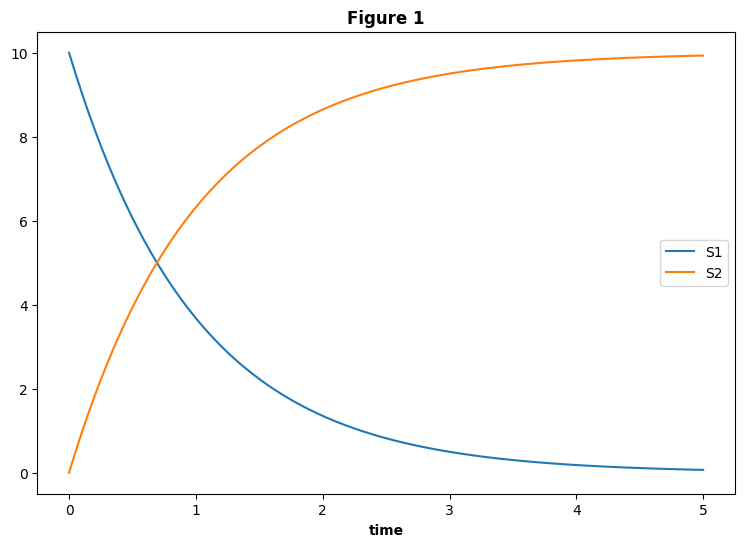

In [13]:
import tempfile, os, shutil

workingDir = tempfile.mkdtemp(suffix="_sedml")

sbml_file = os.path.join(workingDir, 'myModel')
sedml_file = os.path.join(workingDir, 'sed_main.xml')

with open(sbml_file, 'wb') as f:
    f.write(sbml_str.encode('utf-8'))
    f.flush()
    print('SBML written to temporary file')

with open(sedml_file, 'wb') as f:
    f.write(sedml_str.encode('utf-8'))
    f.flush()
    print('SED-ML written to temporary file')

# For technical reasons, any software which uses libSEDML
# must provide a custom build - Tellurium uses tesedml
import libsedml
sedml_doc = libsedml.readSedML(sedml_file)
n_errors = sedml_doc.getErrorLog().getNumFailsWithSeverity(libsedml.LIBSEDML_SEV_ERROR)
print('Read SED-ML file, number of errors: {}'.format(n_errors))
if n_errors > 0:
    print(sedml_doc.getErrorLog().toString())

# execute SED-ML using Tellurium
te.executeSEDML(sedml_str, workingDir=workingDir)

# clean up
#shutil.rmtree(workingDir)